Autores Gabriel Conejo Valerio -2014093542 Nasser Brown Joseph Jimenez Zuñiga - 2016133677

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Set de Datos 'Rain in Australia'

In [3]:
df = pd.read_csv("weatherAUS.csv")

df = df.dropna()
df = df.reset_index(drop=True)

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31069,2014-02-24,Brisbane,19.6,28.5,1.2,8.4,7.8,SSE,28.0,SE,...,68.0,46.0,1018.1,1015.4,1.0,4.0,24.9,27.3,Yes,Yes
31070,2014-02-25,Brisbane,19.9,29.6,1.4,9.2,8.4,E,31.0,SSE,...,64.0,51.0,1016.9,1013.3,4.0,6.0,25.4,28.3,Yes,No
31071,2014-02-26,Brisbane,19.1,29.5,0.0,8.4,10.7,ENE,24.0,SSW,...,58.0,50.0,1016.1,1013.1,4.0,2.0,25.9,28.6,No,No
31072,2014-02-27,Brisbane,19.3,30.7,0.0,7.2,12.2,NE,24.0,WNW,...,56.0,46.0,1016.5,1013.7,2.0,1.0,26.6,29.0,No,No


Optimizacion de datos

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df['Date'] = pd.to_datetime(df['Date'])

df = pd.get_dummies(df, columns=['Location'], prefix='Location')

wind_direction_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
le = LabelEncoder()
for column in wind_direction_columns:
    df[column] = le.fit_transform(df[column].astype(str))

binary_columns = ['RainToday', 'RainTomorrow']
for column in binary_columns:
    df[column] = df[column].map({'No': 0, 'Yes': 1})

scaler = MinMaxScaler()
df = df.reset_index(drop=True)
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Location_Mildura,Location_Moree,Location_NorfolkIsland,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_WaggaWagga,Location_Watsonia,Location_Williamtown
0,2009-01-01,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,0,0,0,0,0,0,0,0,0,0
1,2009-01-02,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,0,0,0,0,0,0,0,0,0,0
2,2009-01-04,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,0,0,0,0,0,0,0,0,0,0
3,2009-01-05,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,0,0,0,0,0,0,0,0,0,0
4,2009-01-06,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31069,2014-02-24,19.6,28.5,1.2,8.4,7.8,10,28.0,9,2,...,0,0,0,0,0,0,0,0,0,0
31070,2014-02-25,19.9,29.6,1.4,9.2,8.4,0,31.0,10,0,...,0,0,0,0,0,0,0,0,0,0
31071,2014-02-26,19.1,29.5,0.0,8.4,10.7,1,24.0,11,1,...,0,0,0,0,0,0,0,0,0,0
31072,2014-02-27,19.3,30.7,0.0,7.2,12.2,4,24.0,14,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
correlation_matrix = abs(df.corr())
correlation_threshold = 0.2
significant_features = correlation_matrix['RainTomorrow'][abs(correlation_matrix['RainTomorrow']) > correlation_threshold]
features = significant_features.index.tolist()
print("Características seleccionadas basadas en correlación:")
print(features)
X = df[features].values
y = df.RainTomorrow.values
scaler = MinMaxScaler()
X =  scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


Características seleccionadas basadas en correlación:
['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']


<ipython-input-5-f5e45d0d8ab7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = abs(df.corr())


Set de Datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 5.csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 5 (1).csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 4.csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 4 (1).csv")
df = pd.read_csv("SetDatos/matrix-Eval-Introduccion A La Programacion GR 4 (2).csv")
df= pd.read_csv("SetDatos/p1-3-2-2.csv")
df["F"] = np.where(df["F"] < 67.5, 0, 1)

df.head()

,E1,E2,Q1,F
0,57.4,75.6,93.3,1
1,100.0,96.3,86.7,1
2,19.6,46.7,26.7,0
3,34.5,34.2,36.7,0
4,89.5,87.7,93.3,1


In [ ]:
features = ['E1', 'E2',  'Q1']
X = df[features]
y = df.F
X_train_notesDataset, X_test_notesDataset, y_train_notesDataset, y_test_notesDataset = train_test_split(X, y, test_size=0.15, random_state=45)
scaler = MinMaxScaler()
X_train__notesDataset = scaler.fit_transform(X_train_notesDataset)
X_test__notesDataset = scaler.transform(X_test_notesDataset)

Set de Datos seleccionado

In [ ]:
df = pd.read_csv("SetDatos/dataBankruptcy.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
correlation_matrix = df.corr()
correlation_threshold = 0.2
significant_features = correlation_matrix['Bankrupt?'][abs(correlation_matrix['Bankrupt?']) > correlation_threshold]
features = significant_features.index.tolist()
print("Características seleccionadas basadas en correlación:")
print(features)
X = df[features]
y = df['Bankrupt?']
X_train_selectedDataset, X_test_selectedDataset, y_train_selectedDataset, y_test_selectedDataset = train_test_split(X, y, test_size=0.15, random_state=45)
scaler = MinMaxScaler()
X_train_selectedDataset = scaler.fit_transform(X_train_selectedDataset)
X_test_selectedDataset = scaler.transform(X_test_selectedDataset)

Características seleccionadas basadas en correlación:
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets', ' Net Income to Total Assets']


Aplicacion de Algoritmos

Regresion Logistica

In [121]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.w = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

    def score(self, y_pred,y_test):
        return float(sum(y_pred == y_test)) / float(len(y_test))

Aplicacion de Algoritmo Logistic Regression sobre el set de datos Rain in Australia

In [134]:
# Crea y entrena el modelo de regresión logística
model = LogisticRegression(lr=0.05, num_iter=1000)
model.fit(X_train, y_train)
probs = model.predict_prob(X_test)
y_pred = model.predict(X_test, 0.6)
print("Precisión del modelo Regresion Logistica para el set de Datos Weather: ",model.score(y_pred,y_test))


Precisión del modelo Regresion Logistica para el set de Datos Weather:  1.0


Aplicacion de Algoritmo Logistic Regression sobre el set de 'Notas del curso de Introduccion a la Programacion'

In [ ]:
# Crea y entrena el modelo de regresión logística
model = LogisticRegression(lr=0.15, num_iter=10000)
model.fit(X_train_notesDataset, y_train_notesDataset)
probs = model.predict_prob(X_test_notesDataset)
y_pred_notesDataset = model.predict(X_test_notesDataset, 0.6)
print("Precisión del modelo Regresion Logistica para el set de datos Notas del curso: ",model.score(y_pred_notesDataset,y_test_notesDataset))


Precisión del modelo Regresion Logistica para el set de datos Notas del curso:  0.7894736842105263


Aplicacion de Algoritmo Logistic Regression sobre el set elegido

In [ ]:
# Crea y entrena el modelo de regresión logística
model = LogisticRegression(lr=0.15, num_iter=3500)
model.fit(X_train_selectedDataset, y_train_selectedDataset)
probs = model.predict_prob(X_test_selectedDataset)
y_pred_selectedDataset = model.predict(X_test_selectedDataset, 0.5)
print("Precisión del modelo Regresion Logistica para el set de datos elegido: ",model.score(y_pred_selectedDataset,y_test_selectedDataset))


Precisión del modelo Regresion Logistica para el set de datos elegido:  1.0


Arboles de decision

In [136]:
# Definición de la función para calcular la entropía
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Definición de la función para dividir los datos
def split_data(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    return X_left, y_left, X_right, y_right

# Definición de la clase del nodo del árbol de decisión
class Node:
    def __init__(self, depth=0, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def fit(self, X, y):
        unique_classes, class_counts = np.unique(y, return_counts=True)
        self.value = unique_classes[np.argmax(class_counts)]
        if self.depth == self.max_depth or len(unique_classes) == 1: # Se pregunta las dos condiciones de paradas, sin divisiones y profundidad máxima
            return

        num_features = X.shape[1] # cantidad de Features
        best_info_gain = -1 # métrica

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, y_left, X_right, y_right = split_data(X, y, feature_index, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                info_gain = entropy(y) - ((len(y_left) / len(y)) * entropy(y_left) + (len(y_right) / len(y)) * entropy(y_right))

                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.feature_index = feature_index
                    self.threshold = threshold

        if self.feature_index is not None:
            X_left, y_left, X_right, y_right = split_data(X, y, self.feature_index, self.threshold)
            self.left = Node(depth=self.depth + 1, max_depth=self.max_depth)
            self.left.fit(X_left, y_left)
            self.right = Node(depth=self.depth + 1, max_depth=self.max_depth)
            self.right.fit(X_right, y_right)

    def predict(self, X):
        if self.feature_index is None:
            return self.value
        if X[self.feature_index] <= self.threshold:
            return self.left.predict(X)
        else:
            return self.right.predict(X)

Aplicacion de Algoritmo Arboles de decision sobre el set de datos Rain in Australia

In [137]:
max_depth = 5
tree = Node(max_depth=max_depth)
tree.fit(X_train, y_train)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del Algoritmo Arboles de decision sobre el set de datos Rain in Australia : {accuracy:.2f}")


Precisión del Algoritmo Arboles de decision sobre el set de datos Rain in Australia : 1.00


Aplicacion de Algoritmo Arboles de decision sobre el set de 'Notas del curso de Introduccion a la Programacion'

In [ ]:
max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_notesDataset, y_train_notesDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_notesDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_notesDataset)
print(f"Precisión del Algoritmo Arboles de decision sobre el set de datos 'Notas del curso de Introduccion a la Programacion' : {accuracy:.2f}")

Aplicacion de Algoritmo Arboles de decision sobre el set elegido

In [ ]:
max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_selectedDataset, y_train_selectedDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_selectedDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_selectedDataset)
print(f"Precisión del Algoritmo Arboles de decision sobre el set elegido : {accuracy:.2f}")


Precisión del Algoritmo Arboles de decision sobre el set elegido : 1.00


KNN

In [6]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_classes = 3, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = n_classes

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#       print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)


    def predict(self, X_test):
        y_pred = []

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])

        if self.weights == 'distance':
            neighbors_dist, neighbors_indices = self.kneighbors(X_test, return_distance=True)

            for i in range(len(neighbors_indices)):
                dist_list = neighbors_dist[i]
                ind_list = neighbors_indices[i]

                weighted_votes = [0] * self.n_classes

                for i in range(len(ind_list)):
                    assert dist_list[i] != 0
                    weight = 1 / dist_list[i]
                    class_label = self.y_train[ind_list[i]]
                    weighted_votes[class_label] += weight

                predicted_class = np.argmax(weighted_votes)
                y_pred.append(predicted_class)

        return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test



Aplicacion de Algoritmo KNearestNeighbors sobre el set de datos Rain in Australia

In [7]:
from sklearn.neighbors import KNeighborsClassifier

our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=30)

our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
sklearn_classifier = KNeighborsClassifier(n_neighbors=30).fit(X_train, y_train)
sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],
             ['Our Implementation', 'Sklearn\'s Implementation'])

,Our Implementation,Sklearn's Implementation
Accuracy,1.0,1.0


Aplicacion de Algoritmo KNearestNeighbors sobre el set de 'Notas del curso de Introduccion a la Programacion'

In [23]:
from sklearn.neighbors import KNeighborsClassifier
our_classifier = KNearestNeighbors(X_train_notesDataset, y_train_notesDataset, n_neighbors=30)
sklearn_classifier = KNeighborsClassifier(n_neighbors=30).fit(X_train_notesDataset, y_train_notesDataset)

our_accuracy, y_pred, y_test = our_classifier.score(X_test_notesDataset, y_test_notesDataset)
sklearn_accuracy = sklearn_classifier.score(X_test_notesDataset, y_test_notesDataset)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],
             ['Our Implementation', 'Sklearn\'s Implementation'])



NameError: ignored

Aplicacion de Algoritmo KNearestNeighbors sobre el set elegido

In [66]:
from sklearn.neighbors import KNeighborsClassifier
our_classifier = KNearestNeighbors(X_train_selectedDataset, y_train_selectedDataset, n_neighbors=30)
sklearn_classifier = KNeighborsClassifier(n_neighbors=30).fit(X_train_selectedDataset, y_train_selectedDataset)

our_accuracy, y_pred, y_test = our_classifier.score(X_test_selectedDataset, y_test_selectedDataset)
sklearn_accuracy = sklearn_classifier.score(X_test_selectedDataset, y_test_selectedDataset)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],
             ['Our Implementation', 'Sklearn\'s Implementation'])

max_depth = 3
tree = Node(max_depth=max_depth)
tree.fit(X_train_weatherDataset, y_train_weatherDataset)

# Realización de predicciones en el conjunto de prueba
y_pred = [tree.predict(x) for x in X_test_weatherDataset]

# Evaluación del modelo
accuracy = np.mean(y_pred == y_test_weatherDataset)
print(f"Precisión del Algoritmo KNearestNeighbors sobre el set de datos elegido : {accuracy:.2f}")


NameError: ignored

Aplicacion de Metricas

Accuracy

Aplicacion de Metrica Accuracy sobre el set de datos Rain in Australia

In [ ]:
from sklearn.metrics import accuracy_score
print("Metrica Accuracy sobre el set Rain in Australia ")
y_test_int = y_test_weatherDataset.astype(int)
y_pred_int = y_pred_weatherDataset.astype(int)
accuracy = accuracy_score(y_test_int, y_pred_int)
print("The accuracy of prediction is:", accuracy)
accurate_predictions = accuracy_score(y_test_int, y_pred_int, normalize=False)
print("The number of accurate predictions is:", accurate_predictions)


Metrica Accuracy sobre el set Rain in Australia 
The accuracy of prediction is: 1.0
The number of accurate predictions is: 18657


Aplicacion de Metrica Accuracy sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.metrics import accuracy_score
print("Metrica Accuracy sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")
accuracy = accuracy_score(y_train_notesDataset, y_test_notesDataset)
print("The accuracy of prediction is: ", accuracy)
accurate_predictions = accuracy_score(y_train_notesDataset, y_test_notesDataset, normalize=False)
print("The number of accurate predictions is: ", accurate_predictions)

Aplicacion de Metrica Accuracy sobre el set de datos elegido

In [ ]:
from sklearn.metrics import accuracy_score
print("Metrica Accuracy sobre el set de datos elegido ")
accuracy = accuracy_score(y_test_selectedDataset, y_pred_selectedDataset)
print("The accuracy of prediction is:", accuracy)
accurate_predictions = accuracy_score(y_test_selectedDataset, y_pred_selectedDataset, normalize=False)
print("The number of accurate predictions is:", accurate_predictions)


Precision

Aplicacion de Metrica Precision sobre el set de datos Rain in Australia

In [ ]:
from sklearn.metrics import precision_score
print("Metrica Precision sobre el set de Rain in Australia ")
y_test_weatherDataset = (y_test_weatherDataset > 0.5).astype(int)
y_pred_weatherDataset = (y_pred_weatherDataset > 0.5).astype(int)
precision = precision_score(y_test_weatherDataset, y_pred_weatherDataset, zero_division=0.0)
print("The precision score is:", precision)


Metrica Precision sobre el set de Rain in Australia 
The precision score is: 0.0


Aplicacion de Metrica Presicion sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.metrics import precision_score
print("Metrica Precision sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")
precision = precision_score(y_train_notesDataset, y_test_notesDataset)
print("The accuracy of precision is: ", precision)

Aplicacion de Metrica Presicion sobre el set de datos elegido

In [ ]:
from sklearn.metrics import precision_score
print("Metrica Precision sobre el set de datos elegido ")
y_test_selectedDataset = (y_test_selectedDataset > 0.5).astype(int)
y_pred_selectedDataset = (y_pred_selectedDataset > 0.5).astype(int)
precision = precision_score(y_test_selectedDataset, y_pred_selectedDataset, zero_division=0.0)
print("The precision score is:", precision)

Metrica Precision sobre el set de datos elegido 
The precision score is: 1.0


Recall

Aplicacion de Metrica Recall sobre el set de datos Rain in Australia

In [ ]:
from sklearn.metrics import recall_score
print("Metrica Recall sobre el set de datos Rain in Australia ")
recall = recall_score(y_test_weatherDataset, y_pred_weatherDataset, zero_division=0.0)
print("The recall of prediction is: ", recall)

Metrica Recall sobre el set de datos Rain in Australia 


The recall of prediction is:  0.0


Aplicacion de Metrica Recall sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
from sklearn.metrics import  recall_score
print("Metrica Precision sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")
recall = recall_score(y_train_notesDataset, y_test_notesDataset)
print("The recall of prediction is: ", recall)

Aplicacion de Metrica Recall sobre el set de datos elegido

In [ ]:
from sklearn.metrics import  recall_score
print("Metrica Precision sobre el set de datos elegido ")
y_test_weatherDataset = (y_test_weatherDataset > 0.5).astype(int)
y_pred_weatherDataset = (y_pred_weatherDataset > 0.5).astype(int)
precision = precision_score(y_test_weatherDataset, y_pred_weatherDataset, zero_division=0.0)
print("The precision score is:", precision)


Metrica Precision sobre el set de datos elegido 
The precision score is: 0.0


AUC

Aplicacion de Metrica AUC sobre el set de datos Rain in Australia

In [ ]:
import numpy as np
from sklearn .metrics import roc_auc_score

y_true = np.round(np.array(y_test_weatherDataset))
y_pred = y_pred_weatherDataset.astype(int)
print(y_true)
print(y_pred)

try:
    auc = np.round(roc_auc_score(y_true, y_pred), 3)
except ValueError:
    pass

print("Auc for our sample data is {}".format(auc))


[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
Auc for our sample data is 0.778


Aplicacion de Metrica AUC sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
import numpy as np
from sklearn .metrics import roc_auc_score

y_true = np.round(np.array(y_test_notesDataset))
y_pred = y_pred_notesDataset.astype(int)
print(y_true)
print(y_pred)

try:
    auc = np.round(roc_auc_score(y_true, y_pred), 3)
except ValueError:
    pass

print("Auc for our sample data is {}".format(auc))

[ 70  70  85  50  70  45   0  50 100   5  20  65  55  20  30  50  75  95
   0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Auc for our sample data is 0.778


Aplicacion de Metrica AUC sobre el set de datos elegido

In [ ]:
from sklearn .metrics import roc_auc_score

ROC  (grafica)

Aplicacion de Metrica ROC (grafica) sobre el set de datos Rain in Australia

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

print("Metrica ROC (grafica) sobre el set de datos Rain in Australia ")

probs = model.predict_prob(X_test_weatherDataset)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_weatherDataset, probs)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Trazar la curva de Sensibilidad vs. Especificidad
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curva Sensibilidad vs. Especificidad')
plt.grid(True)
plt.show()


Aplicacion de Metrica ROC (grafica) sobre el set de datos 'Notas del curso de Introduccion a la Programacion'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
print("Metrica ROC (grafica) sobre el set de datos 'Notas del curso de Introduccion a la Programacion' ")

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_notesDataset, probs)

# Calcular la Sensibilidad y la Especificidad para cada umbral
sensibilidad = tpr  # Sensibilidad es igual a la Tasa de Verdaderos Positivos (TPR)
especificidad = 1 - fpr  # Especificidad es igual a 1 menos la Tasa de Falsos Positivos (FPR)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Trazar la curva de Sensibilidad vs. Especificidad
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curva Sensibilidad vs. Especificidad')
plt.grid(True)

plt.show()

umbral = 0.5
sensibilidad_umbral = tpr[np.argmax(thresholds >= umbral)]
especificidad_umbral = 1 - fpr[np.argmax(thresholds >= umbral)]
print(f"Sensibilidad (TPR) a umbral {umbral}: {sensibilidad_umbral:.2f}")
print(f"Especificidad a umbral {umbral}: {especificidad_umbral:.2f}")

Aplicacion de Metrica ROC (grafica) sobre el set de datos elegido

Metrica ROC (grafica) sobre el set de datos elegido 


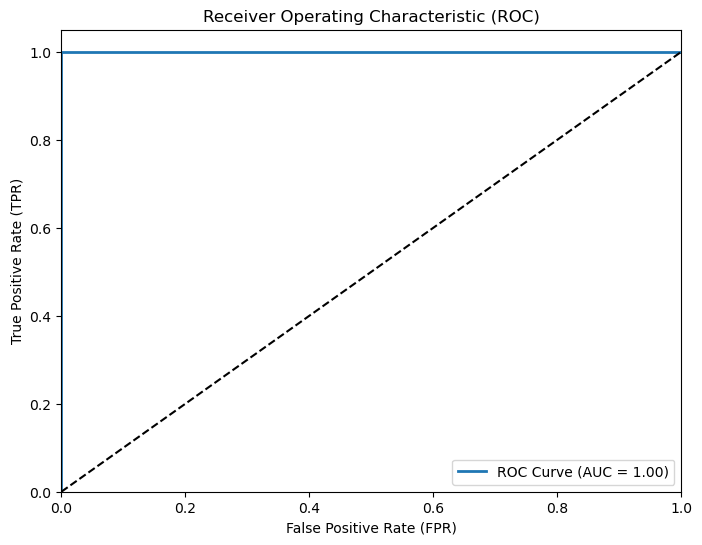

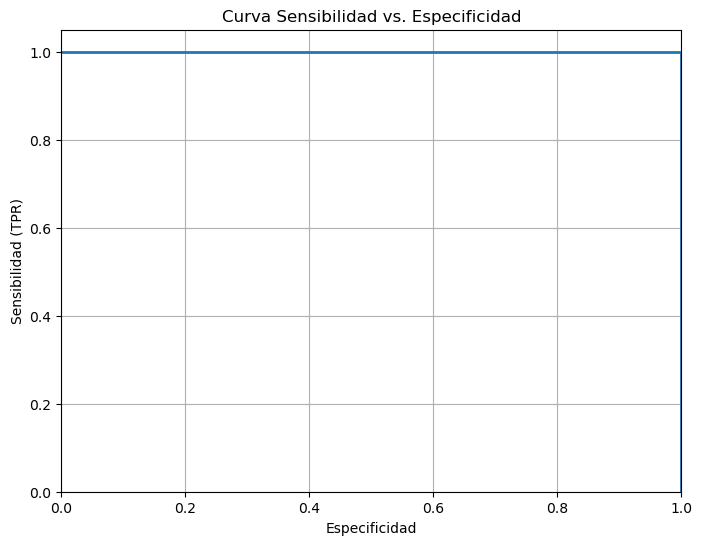

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

print("Metrica ROC (grafica) sobre el set de datos elegido ")

# Obtener las probabilidades del modelo en el conjunto de prueba
probs = model.predict_prob(X_test_selectedDataset)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_selectedDataset, probs)

# Calcular el AUC (Área bajo la curva ROC)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Trazar la curva de Sensibilidad vs. Especificidad
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curva Sensibilidad vs. Especificidad')
plt.grid(True)

plt.show()


Puntos extra: modelo que prediga la nota del estudiante (utilizando el set de datos de Introduccion a la Programacion)